In [1]:
import os
os.chdir(os.path.expanduser("~/work/nbs_pipeline"))

In [2]:
#| export
verbose                       = 1
check_memory_usage            = True
time_flag                     = True
window_size_percentage        = True
show_plots                    = True
reset_kernel                  = False
pre_configured_case           = True
case_id                       = 7
frequency_factor              = 1
frequency_factor_change_alias = True
check_parameters              = True
cuda_device                   = 0
remove_lambdas_flag           = True

MOIRAI: Toy complete execution

In [3]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from huggingface_hub import hf_hub_download

from uni2ts.eval_util.plot import plot_single
from uni2ts.model.moirai import MoiraiForecast, MoiraiModule
import sys
import dvats.utils as ut
import torch
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from huggingface_hub import hf_hub_download

import uni2ts
from uni2ts.eval_util.plot import plot_single
from uni2ts.model.moirai import MoiraiForecast, MoiraiModule
from uni2ts.eval_util.plot import plot_next_multi
import pyarrow.feather as ft
from gluonts.transform.split import TFTInstanceSplitter
from gluonts.transform.sampler import TestSplitSampler
import numpy as np
import einops
import torch.nn.functional as F
from dvats.memory import gpu_memory_status

In [4]:
#| export
device = torch.device(f'cuda:{cuda_device}' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)
if check_memory_usage:
    gpu_device = torch.cuda.current_device()
    gpu_memory_status(gpu_device)

GPU | Used mem: 8
GPU | Used mem: 24
GPU | Memory Usage: [██████--------------] 33%


In [5]:
import dvats.config as cfg_

In [6]:
cfg_.show_available_configs()

Available datasets: 
0 - monash_australian_electricity_demand_0
1 - monash_solar_4_seconds_0
2 - wikipedia_0
3 - traffic_san_francisco_0
4 - monash_solar_10_minutes_0
5 - etth1_0
6 - stumpy_abp_0
7 - stumpy_toy_0


In [7]:
#| export
import warnings
warnings.filterwarnings("ignore", module="umap")
import os
import sys
sys.path.append(os.path.abspath('..'))
from dvats.all import *
from fastcore.all import *
from tsai.basics import *
from tsai.models.InceptionTimePlus import *
from tsai.callback.MVP import *
import matplotlib.colors as colors
from fastai.callback.wandb import WandbCallback
from fastai.callback.progress import ShowGraphCallback
from fastai.callback.schedule import *
from fastai.callback.tracker import EarlyStoppingCallback
import wandb
from momentfm import MOMENTPipeline
import torch
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from huggingface_hub import hf_hub_download

from uni2ts.eval_util.plot import plot_single
from uni2ts.model.moirai import MoiraiForecast, MoiraiModule
from uni2ts.eval_util.plot import plot_next_multi


Octave is ready <oct2py.core.Oct2Py object at 0x7f1b48174b20>

















In [8]:
#| export
user, project, version, data, config, job_type = cfg_.get_artifact_config_MVP(False)
if pre_configured_case: 
    cfg_.force_artifact_config_mvp(
        config = config,
        id = case_id,
        verbose = verbose, 
        both = verbose > 0,
        frequency_factor = frequency_factor,
        frequency_factor_change_alias = frequency_factor_change_alias
    )

artifact_name is missing in original dict | toy 
norm_use_by_single_batch is missing in original dict | (False,) 
norm_use_single_batch: False
time_col is missing in original dict | None 
epochs: 100
r: 0.71
mask_sync: False
wandb_group: None
train_artifact: mi-santamaria/deepvats/PulsusParadoxus-SP02:latest -> mi-santamaria/deepvats/toy:latest
valid_artifact: None
data_fpath is missing in original dict | ~/data/toy.csv 
mask_stateful: True
mvp_ws: (15, 100) -> [10, 30]
freq is missing in original dict | 1s 
w: 100 -> 30
stride: 900 -> 1
batch_size: 512 -> 32
csv_config is missing in original dict | {} 
mask_future: False
valid_size: 0.2
norm_by_sample: False
alias: PulsusParadoxus-SP02 -> toy
data_cols is missing in original dict | [] 
analysis_mode: online
use_wandb: True


In [9]:
#| export
path = os.path.expanduser("~/work/nbs_pipeline/")
name="02c_encoder_moment-embedding"
os.environ["WANDB_NOTEBOOK_NAME"] = path+name+".ipynb"
runname=name
if verbose > 0: print("runname: "+runname)
if verbose > 0: cfg_.show_attrdict(config)

runname: 02c_encoder_moment-embedding
alias: toy
analysis_mode: online
batch_size: 32
epochs: 100
mask_future: False
mask_stateful: True
mask_sync: False
mvp_ws: [10, 30]
norm_by_sample: False
norm_use_single_batch: False
r: 0.71
stride: 1
train_artifact: mi-santamaria/deepvats/toy:latest
valid_artifact: None
use_wandb: True
valid_size: 0.2
w: 30
wandb_group: None
artifact_name: toy
data_cols: []
data_fpath: ~/data/toy.csv
freq: 1s
time_col: None
csv_config: {}
norm_use_by_single_batch: (False,)


In [10]:
#| export
if verbose > 0: print("--> Wandb init")
run = wandb.init(
    entity = user,
    # work-nbs is a place to log draft runs
    project=project,
    group=config.wandb_group,
    job_type=job_type,
    allow_val_change=True,
    mode=config.analysis_mode,
    config=config,
    # When use_wandb is false the run is not linked to a personal account
    #NOTE: This is not working right now
    anonymous = 'never' if config.use_wandb else 'must', 
    resume=False,
    name = runname
)
if verbose > 0: print("Wandb init -->")
config = run.config  # Object for storing hyperparameters
artifacts_gettr = run.use_artifact if config.use_wandb else wandb_api.artifact

--> Wandb init


wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find /home/macu/work/nbs_pipeline/02c_encoder_moment-embedding.ipynb.
wandb: Currently logged in as: mi-santamaria. Use `wandb login --relogin` to force relogin


Wandb init -->


In [11]:
#| export
config = run.config  # Object for storing hyperparameters
if verbose > 0: cfg_.show_attrdict(config)
artifacts_gettr = run.use_artifact if config.use_wandb else wandb_api.artifact
train_artifact = artifacts_gettr(config.train_artifact)
if verbose > 0: print("---> W&B Train Artifact")

alias: toy
analysis_mode: online
batch_size: 32
epochs: 100
mask_future: False
mask_stateful: True
mask_sync: False
mvp_ws: [10, 30]
norm_by_sample: False
norm_use_single_batch: False
r: 0.71
stride: 1
train_artifact: mi-santamaria/deepvats/toy:latest
valid_artifact: None
use_wandb: True
valid_size: 0.2
w: 30
wandb_group: None
artifact_name: toy
data_cols: []
data_fpath: ~/data/toy.csv
freq: 1s
time_col: None
csv_config: {}
norm_use_by_single_batch: [False]
---> W&B Train Artifact


In [12]:
#| export
import pyarrow.feather as ft
df_train = train_artifact.to_df()
df_train.shape

wandb:   1 of 1 files downloaded.  


(550, 3)

In [14]:
print(df_train.shape)
#display(df_train.head())
display(df_train[10:15])

(550, 3)


,T3,T2,T1
1970-01-01 00:00:10,0.603472,0.607729,0.353346
1970-01-01 00:00:11,0.655628,0.714424,0.305794
1970-01-01 00:00:12,0.663067,0.620628,0.313750
1970-01-01 00:00:13,0.689184,0.630930,0.353046
1970-01-01 00:00:14,0.701148,0.661374,0.335391


In [15]:
#| export
if verbose > 0: print("---> Sliding window | ", config.w,  " | ", config.stride )
sw = SlidingWindow(window_len=config.w, stride=config.stride, get_y=[])
if verbose > 0: print(" Sliding window | ", config.w,  " | ", config.stride, "---> | df_train ~ ", df_train.shape )
X_train, _ = sw(df_train)
if verbose > 0: print(" sw_df_train | ", config.w,  " | ", config.stride, "--->" )

---> Sliding window |  30  |  1
 Sliding window |  30  |  1 ---> | df_train ~  (550, 3)
 sw_df_train |  30  |  1 --->


In [16]:
# n_win x n_vars x win_size
# n_batches x n_features x patch_size (before padding)
X_train.shape

(521, 3, 30)

len(X):  521
--> Split 1


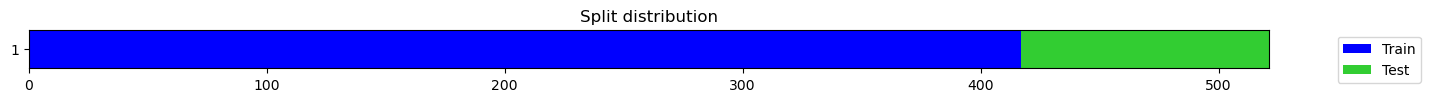

Split --> 417


In [17]:
assert config.analysis_mode in ['offline','online'], 'Invalid analysis mode'

X = X_train
if verbose > 0: print("len(X): ", len(X));
if config.analysis_mode == 'online':
    if verbose > 0: print("--> Split 1")
    splits = TimeSplitter(valid_size=0.2, show_plot=show_plots)(X)
elif config.analysis_mode == 'offline':
    if verbose > 0: print("--> Split 2")
    splits = get_splits(np.arange(len(X)), valid_size=config.valid_size, show_plot = show_plots)
if verbose > 0: 
    print("Split -->", len(splits[0]))

In [18]:
#| hide
if verbose > 0: 
    print(X.shape)
    display(splits)
    

(521, 3, 30)


((#417) [0,1,2,3,4,5,6,7,8,9...],
 (#104) [417,418,419,420,421,422,423,424,425,426...])

In [19]:
len(splits)
len(splits[0])

417

In [20]:
X_train.shape

(521, 3, 30)

Ñapa para ver si es un problema de tamaños o qué (dejar 1 ventana solo como en el  ejemplo de uso)

In [21]:
#X_train = X_train[0]
#X_train = einops.rearrange(  torch.as_tensor(X_train, dtype = torch.float32), "... -> 1 ...")
#X_train.shape

Hasta aquí la ñapa

In [22]:
past_target = einops.rearrange(
    torch.as_tensor(X_train, dtype = torch.float32),
    "n_windows n_vars window_size -> n_windows window_size n_vars"
)
# 1s if the value is observed, 0s otherwise. Shape: (batch, time, variate)
past_observed_target = torch.ones_like(past_target, dtype=torch.bool)
# 1s if the value is padding, 0s otherwise. Shape: (batch, time)
past_is_pad = torch.zeros_like(past_target, dtype=torch.bool)[...,:,-1] # Kill last dimension

In [23]:
print(past_target.shape)
print(past_observed_target.shape)
print(past_is_pad.shape)

torch.Size([521, 30, 3])
torch.Size([521, 30, 3])
torch.Size([521, 30])


In [24]:
#patch_size = 32 -> ok
patch_size = 8

In [25]:
observed_mask = torch.ones_like(past_target, dtype = bool)


¿ Pero tiene sentido separar en Train y test en un zero - shot ? 
Cojámoslo entero
Y cojamos todo como input en lugar de input y label

In [33]:
import importlib
def remove_lambdas(verbose = 0, base_path = "/usr/local/share/lib/"):
    
    
    path = base_path+"uni2ts/src/uni2ts/distribution/mixture.py"
    if verbose > 0: print(f"remove_lambdas | read file {path}")
    # Read the file
    with open(path, 'r') as file:
        lines = file.readlines()
    # Check wether identity is defined or not
    identity_defined = any("def identity(" in line for line in lines)
    if verbose > 0: print(f"remove_lambdas | identity already defined? {identity_defined}")
    if not identity_defined: 
        if verbose > 0: print("remove_lambdas | Look for domain_map line")
        for i, line in enumerate(lines):
            if "@property" in line and "def domain_map" in lines[i+1]:                
                domain_map_property_index = i
                break
        if verbose > 0: print(f"remove_lambdas | Domain map in line {i}")
        # Insert identity function
        identity_code = """
    def identity(self, x): 
        return x

"""
        lines.insert(domain_map_property_index, identity_code)
        # Modify weights_logits line 
        inside_domain_map = False
        for i in range(domain_map_property_index, len(lines)):
            if "weights_logits" in lines[i]:
                # Reemplazar la línea para que use identity
                lines[i] = "            weights_logits = self.identity,\n"
                break
        # Write changes 
        with open(path, 'w') as file:
            file.writelines(lines)
        importlib.reload(uni2ts)
    else:
        if identity_defined:
            print("Identity already defined")    

In [39]:
os.chdir(os.path.expanduser("~/work/nbs_pipeline/_"))

In [40]:
! ls ./uni2ts/src/uni2ts/distribution/mixture.py

./uni2ts/src/uni2ts/distribution/mixture.py


In [41]:
remove_lambdas(0,"./")

wandb: ERROR Error while calling W&B API: context deadline exceeded (<Response [500]>)


In [26]:
module = MoiraiModule.from_pretrained(f"Salesforce/moirai-1.1-R-small")

TypeError: unsupported operand type(s) for *: 'method' and 'int'

In [29]:
import importlib

def restore_lambdas(verbose=0):
    base_path = "/usr/local/share/lib/"
    path = base_path + "uni2ts/src/uni2ts/distribution/mixture.py"
    if verbose > 0: 
        print(f"restore_lambdas | read file {path}")
    
    # Leer el archivo
    with open(path, 'r') as file:
        lines = file.readlines()
    
    # Buscar la función identity e identificar si ya está presente
    identity_defined = any("def identity(" in line for line in lines)
    
    if verbose > 0: 
        print(f"restore_lambdas | identity already defined? {identity_defined}")
    
    # Si identity está definido, removerlo y restaurar el lambda original
    if identity_defined:
        if verbose > 0: 
            print("restore_lambdas | Removing identity function and restoring lambda")

        # Encontrar el índice de la función identity
        for i, line in enumerate(lines):
            if "def identity(" in line:
                identity_start_index = i
                break

        # Eliminar la función identity
        # Asumimos que la función identity tiene 3 líneas: def, return, y una línea en blanco
        del lines[identity_start_index:identity_start_index + 3]

        # Restaurar el lambda en la línea de weights_logits
        inside_domain_map = False
        for i in range(len(lines)):
            if "weights_logits" in lines[i]:
                # Restaurar la línea original
                lines[i] = "            weights_logits=lambda x: x,\n"
                break
        
        # Escribir los cambios
        with open(path, 'w') as file:
            file.writelines(lines)
        
        # Recargar el módulo modificado
        importlib.reload(uni2ts)
    else:
        print("restore_lambdas | No identity function found to remove.")


In [30]:
restore_lambdas()

PermissionError: [Errno 13] Permission denied: '/usr/local/share/lib/uni2ts/src/uni2ts/distribution/mixture.py'

In [ ]:
# Auxiliar model for conversions just to ensure correct sizes
forecast_model =  MoiraiForecast(
    module=module,
    prediction_length=past_target.shape[2], #random, just for getting the model
    context_length=past_target.shape[1],
    patch_size=patch_size,
    num_samples=100, #Random, is the number of forecasting, not interesting for us
    target_dim=past_target.shape[2],
    feat_dynamic_real_dim=0,
    past_feat_dynamic_real_dim=0,
)

In [ ]:
forecast = forecast_model(
    past_target=past_target,
    past_observed_target=past_observed_target,
    past_is_pad=past_is_pad,
)

In [ ]:
(
    target,
    observed_mask,
    sample_id,
    time_id,
    variate_id,
    prediction_mask,
) = forecast_model._convert(
    patch_size,
    past_target,
    past_observed_target,
    past_is_pad
)

In [ ]:
from fastai.callback.hook import *

from tsai.models.layers import *

def get_acts_and_grads(
    model, 
    modules, 
    y=None, 
    detach=True, 
    cpu=False,
    attr_name = "data",
    verbose = 0,
    **model_kwargs
):
    r"""Returns activations and gradients for given modules in a model and a single input or a batch. 
    Gradients require y value(s). If they are not provided, it will use the predictions. """
    if not isinstance(modules, list): modules = [modules]
    if ('x' in model_kwargs):
        x = x[None, None] if x.ndim == 1 else x[None] if x.ndim == 2 else x
    if cpu: 
        model = model.cpu()
        #x = x.cpu()
        for key in model_kwargs:
            try: #if not able to be moved, just not move it
                model_kwargs[key] = model_kwargs[key].cpu()
            except:
                continue
    with hook_outputs(modules, detach=detach, cpu=cpu) as h_act:
        if verbose > 0:
            print("get_act_and_grads | hook outputs | h_act")
        with hook_outputs(modules, grad=True, detach=detach, cpu=cpu) as h_grad:
            if verbose > 0:
                print("get_act_and_grads | hook outputs | h_grad")
            preds = model.eval()(**model_kwargs)
            try:
                preds.requires_grad_(True)
                if verbose > 1:
                    print(f"Get_acts_and_grads | hooks | preds req grads ? {preds.requires_grad}")
                #print(f"Get_acts_and_grads | hooks | preds ? {preds}")
                if y is None: 
                    preds.max(dim=-1).values.mean().backward()
                    #print(f"Get_acts_and_grads | hooks | preds grad ? {preds.grad}")
                else: 
                    y = y.detach().cpu().numpy()
                    if preds.shape[0] == 1: 
                        preds[0, y].backward()
                    else: 
                        if y.ndim == 1: y = y.reshape(-1, 1)
                        torch_slice_by_dim(preds, y).mean().backward()
            except Exception as e: 
                if verbose > 1:
                    print(f"Preds {type(preds)} does not have requires_grad")
    if len(modules) == 1: 
        if verbose > 1:
            print(f"get_act_and_grads | h_act stored ~ ", len(h_act.stored))
            print(f"get_act_and_grads | h_act stored: ", h_act.stored)
        try:
            res = getattr(h_act.stored[0], attr_name), getattr(h_act.stored[0][0], attr_name)
        except:
            res = getattr(h_act.stored[0][0], attr_name), getattr(h_act.stored[0][0][0], attr_name)
        return res
    else: 
        return [h.data for h in h_act.stored], [getattr(h_act.stored[0], attr_name) for h in h_grad.stored]

In [ ]:
model_kwargs={
    'target': target, 
    'observed_mask': observed_mask,
    'sample_id': sample_id,
    'time_id': time_id,
    'variate_id': variate_id,
    'prediction_mask': prediction_mask,
    'patch_size': torch.ones_like(sample_id, dtype = torch.float32)*patch_size
} 

In [ ]:
forecast_model_kwargs={
    'past_target': past_target, 
    'past_observed_target': past_observed_target,
    'past_is_pad': past_is_pad
} 

Pequeño trial porque se queda bloqueado y no entiendo por qué


In [ ]:
#predictor = forecast_model.create_predictor(batch_size = target.shape[0])
#forecasts = predictor.predict(target)

Fin del trial

In [ ]:
from dvats.utils import Time

In [ ]:
timer = Time()
timer.start()
module.eval()
embs = [
        get_acts_and_grads(
            model   = module,
            modules = module.encoder.norm,         
            cpu     = False,
            attr_name = "data",
            verbose = 0,
            **model_kwargs
        )[0] 
        for xb in target
    ]
timer.end()
timer.show()

Me da que MOIRAI va a perder la batalla por tiempo de obtención de embeddings. 

In [ ]:
embs[0].shape

In [ ]:
embs = embs[0]

In [ ]:
embs = embs.mean(axis=1)

In [ ]:
embs.shape

In [ ]:
def extract_embeddings_from_all_layers(model, enc_input, **model_kwargs):
    # Iteramos sobre todas las capas del modelo
    for name, module in model.named_modules():
        print(f"Processing layer: {name}")
        mssg = ""
        try:
            embs = [
                get_acts_and_grads(
                    model   = model,
                    modules = [module],  # Registramos el hook en la capa actual
                    cpu     = True,
                    attr_name = "data",  # Ajusta esto si necesitas otro atributo
                    **model_kwargs
                )[0] 
                for xb in enc_input
            ]
            mssg = f"Layer: {name}, Embedding shape: {embs[0].shape}" 
        except Exception as e:
            mssg = f"Layer: {name},  {e}"
        
        # Si se capturan las activaciones, imprimimos el nombre de la capa y su shape
        print(mssg)
        


In [ ]:
# ¿Por qué salen AffineTransformed objects en lugar de gradientes?
#extract_embeddings_from_all_layers(
#    model=module,
#    enc_input = target,
#    **model_kwargs
#)

In [ ]:
forecast_model.named_modules